In [2]:
# 単一ニューロンの実装

class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, inp: float):
        self.input_sum += inp
    
    def get_output(self):
        self.output = self.input_sum
        return self.output

class NeuralNetwork:
    def __init__(self):
        self.neuron = Neuron()
    
    def commit(self, input_data: list): 
        for data in input_data:
            self.neuron.set_input(data)
        return self.neuron.get_output()

neural_network = NeuralNetwork()
input_data = [1.0, 2.0, 3.0]
print(neural_network.commit(input_data))


6.0


In [4]:
# 活性化関数を追加

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, inp: float):
        self.input_sum += inp
    
    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

class NeuralNetwork:
    def __init__(self):
        self.neuron = Neuron()
        self.weight = [1.5, 0.75, -1.0]
    
    def commit(self, input_data: list): 
        for data, weight in zip(input_data, self.weight):
            self.neuron.set_input(data * weight)
        return self.neuron.get_output()

neural_network = NeuralNetwork()

input_data = [1.0, 2.0, 3.0]
print(neural_network.commit(input_data))


0.5


In [6]:
# バイアスを追加

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, inp: float):
        self.input_sum += inp
    
    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

class NeuralNetwork:
    def __init__(self):
        self.neuron = Neuron()
        self.weight = [1.5, 0.75, -1.0]
        self.bias = -1.0
    
    def commit(self, input_data: list): 
        for data, weight in zip(input_data, self.weight):
            self.neuron.set_input(data * weight)
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

neural_network = NeuralNetwork()

input_data = [1.0, 2.0, 3.0]
print(neural_network.commit(input_data))


0.2689414213699951


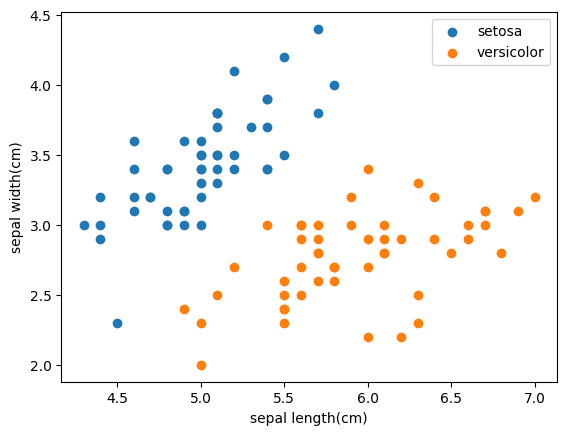

In [3]:
# Irisデータセットの散布図

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# データの読み込み
iris = datasets.load_iris()

# 各花のサイズ
irid_data = iris.data

st_data = irid_data[:50] # setosa
vc_data = irid_data[50:100] # versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="setosa") # sepal length, sepal width
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="versicolor") # sepal length, sepal width
plt.legend()

plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.show()

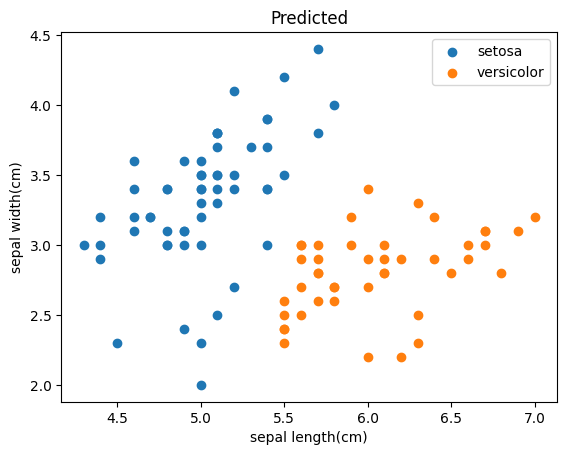

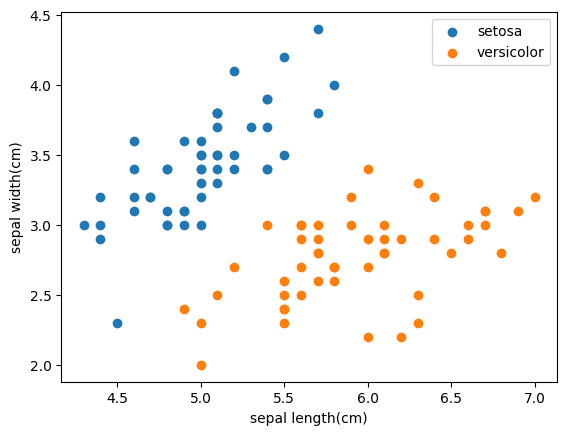

In [5]:
# 単一ニューロンでirisデータを分類

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# データの読み込み
iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0] # setosa & versicolor, sepal length
sw_data = iris_data[:100, 1] # setosa & versicolor, sepal width

# 平均値を0にする
sl_ave = np.average(sl_data)
sw_ave = np.average(sw_data)
sl_data -= sl_ave
sw_data -= sw_ave

input_data = []
for sl, sw in zip(sl_data, sw_data):
    input_data.append([sl, sw])
    
# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, input: float):
        self.input_sum += input
    
    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output
    
    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):
        self.neuron = Neuron()
        self.weight = [0.5, -0.2]
        self.bias = 0.0
    
    def commit(self, input_data: list):
        self.neuron.reset()
        for data, weight in zip(input_data, self.weight):
            self.neuron.set_input(data * weight)
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
st_predicted = [[], []]
vc_predicted = [[], []]
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0] + sl_ave)
        st_predicted[1].append(data[1] + sw_ave)
    else:
        vc_predicted[0].append(data[0] + sl_ave)
        vc_predicted[1].append(data[1] + sw_ave)

# 分布結果を散布図で表示
plt.scatter(st_predicted[0], st_predicted[1], label="setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="versicolor")
plt.legend()

plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.title("Predicted")
plt.show()

# 元データの散布図
st_data = irid_data[:50] # setosa
vc_data = irid_data[50:100] # versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="setosa") # sepal length, sepal width
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="versicolor") # sepal length, sepal width
plt.legend()

plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.show()